In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\alipr\Downloads\Compressed\Wallex Task\Data Analysis Case Study_ 1.xlsx"
df = pd.read_excel(path)
                    
df.head(20)

,TradeID,MakerUserID,TakerUserID,Market,Amount,Price,TradeDateTime
0,1,2000709578,2000710544,SOLTMN,0.958770,546846,2022-12-21 23:40:37.257
1,2,2000709203,2000711186,SOLTMN,1.177560,543800,2022-12-22 23:47:40.413
2,3,2000718137,2000711045,USDTTMN,170.490000,40880,2022-12-26 08:49:42.290
3,4,2000708372,2000708654,USDTTMN,73.140000,41179,2022-12-26 17:42:04.630
4,5,2000707856,2000718728,USDTTMN,8.040000,40999,2022-12-26 20:40:13.223
5,6,2000713952,2000718797,USDTTMN,8.010000,41215,2022-12-28 08:40:45.143
6,7,2000716265,2000718728,ETHTMN,0.005670,58668116,2022-12-28 20:40:30.633
7,8,2000716874,2000712599,BTCTMN,0.000546,771627336,2022-12-29 05:40:52.390
8,9,2000709080,2000722451,BTCTMN,0.000459,782232976,2022-12-29 11:40:47.960
9,10,2000723279,2000715479,BTCTMN,0.000570,779957008,2022-12-29 14:42:05.740


In [32]:
#df.info()

df.describe()

#df.isnull().sum()

,TradeID,MakerUserID,TakerUserID,Amount,Price,TradeDateTime,Month,Year
count,6217.000000,6.217000e+03,6.217000e+03,6217.000000,6.217000e+03,6217,6217.000000,6217.000000
mean,3109.000000,2.000732e+09,2.000719e+09,141.372327,1.223866e+08,2023-05-28 20:20:13.653833984,4.437349,2023.078494
min,1.000000,2.000708e+09,2.000708e+09,0.000003,3.023000e+03,2022-12-21 23:40:37.257000,1.000000,2022.000000
25%,1555.000000,2.000721e+09,2.000709e+09,0.332400,4.968200e+04,2023-03-03 20:43:57.407000064,2.000000,2023.000000
50%,3109.000000,2.000731e+09,2.000709e+09,14.160000,5.216700e+04,2023-06-19 01:39:16.587000064,4.000000,2023.000000
75%,4663.000000,2.000744e+09,2.000727e+09,88.350000,1.110091e+06,2023-06-29 19:34:30.736999936,6.000000,2023.000000
max,6217.000000,2.000755e+09,2.000755e+09,17934.900000,4.017320e+09,2024-02-20 13:38:04.980000,12.000000,2024.000000
std,1794.837644,1.341439e+04,1.337749e+04,585.031258,4.057163e+08,NaN,2.701108,0.278952


In [4]:
df['TradeDateTime'] = pd.to_datetime(df['TradeDateTime'])
df['Date'] = df['TradeDateTime'].dt.date
df['Time'] = df['TradeDateTime'].dt.time
df['Month'] = df['TradeDateTime'].dt.month
df['Year'] = df['TradeDateTime'].dt.year

In [29]:
# transaction frequency / user
transaction_frequency = df.groupby('MakerUserID')['TradeID'].count().reset_index()
transaction_frequency.columns = ['UserID', 'TransactionFrequency']
#print(transaction_frequency.describe())

# total transaction amount / user
transaction_price = df.groupby('MakerUserID')['Price'].sum().reset_index()
transaction_price.columns = ['UserID', 'Price']
#print(transaction_price.describe())

# popular marketss
popular_currency = df.groupby('Market')['TradeID'].count().reset_index()
popular_currency.columns = ['Market', 'TransactionCount']
#print(popular_currency)

# transaction timing patterns
transaction_timing = df.groupby(df['TradeDateTime'].dt.hour)['TradeID'].count().reset_index()
transaction_timing.columns = ['Hour', 'TransactionCount']
#print(transaction_timing)

    Hour  TransactionCount
0      0                11
1      1              1864
2      2               239
3      3                23
4      4               148
5      5               399
6      6                29
7      7               146
8      8               350
9      9                16
10    10               231
11    11               386
12    12               103
13    13               165
14    14               374
15    15                39
16    16               302
17    17               376
18    18                35
19    19               188
20    20               368
21    21                67
22    22                83
23    23               275


In [31]:
# maker transactions / each user
maker_transactions = df.groupby('MakerUserID')['TradeID'].count().reset_index()
maker_transactions.columns = ['UserID', 'MakerTransactions']

# taker transactions / user
taker_transactions = df.groupby('TakerUserID')['TradeID'].count().reset_index()
taker_transactions.columns = ['UserID', 'TakerTransactions']

# Merge maker and taker transactions
user_transactions = pd.merge(maker_transactions, taker_transactions, on='UserID', how='outer')

# Fill NaN
user_transactions = user_transactions.fillna(0)

# relative proportion of maker to taker transactions
user_transactions['RelativeProportion'] = user_transactions['MakerTransactions'] / (user_transactions['TakerTransactions'] + 1)

print(user_transactions)

          UserID  MakerTransactions  TakerTransactions  RelativeProportion
0     2000707580               24.0                0.0                24.0
1     2000707583                2.0                0.0                 2.0
2     2000707649                3.0                0.0                 3.0
3     2000707769                1.0                0.0                 1.0
4     2000707775                2.0                0.0                 2.0
...          ...                ...                ...                 ...
1300  2000754643                0.0                1.0                 0.0
1301  2000754778                0.0                1.0                 0.0
1302  2000755063                0.0                1.0                 0.0
1303  2000755159                0.0                5.0                 0.0
1304  2000755192                0.0                1.0                 0.0

[1305 rows x 4 columns]


In [34]:
# if a unique user has more taker or more maker transactions
user_transactions['MoreTaker'] = user_transactions['TakerTransactions'] > user_transactions['MakerTransactions']
user_transactions['MoreMaker'] = user_transactions['MakerTransactions'] > user_transactions['TakerTransactions']
user_transactions['Equal'] = user_transactions['MakerTransactions'] == user_transactions['TakerTransactions']

# number of users with more taker transactions, more maker transactions, and equal transactions
num_more_taker = user_transactions['MoreTaker'].sum()
num_more_maker = user_transactions['MoreMaker'].sum()
num_equal = user_transactions['Equal'].sum()

# ratio of users with more taker transactions, more maker transactions, and equal transactions to the total number of unique users
total_unique_users = len(user_transactions['UserID'].unique())
ratio_more_taker = num_more_taker / total_unique_users
ratio_more_maker = num_more_maker / total_unique_users
ratio_equal = num_equal / total_unique_users

print("More Maker / Total Unique Users: {:.2f}".format(ratio_more_maker))
print("More Taker / Total Unique Users: {:.2f}".format(ratio_more_taker))
print("Equal / Total Unique Users: {:.2f}".format(ratio_equal))

More Maker / Total Unique Users: 0.58
More Taker / Total Unique Users: 0.36
Equal / Total Unique Users: 0.06


C:\Users\alipr\AppData\Local\Temp\ipykernel_9380\2670127008.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Transaction Behavior', data=data, palette='viridis')


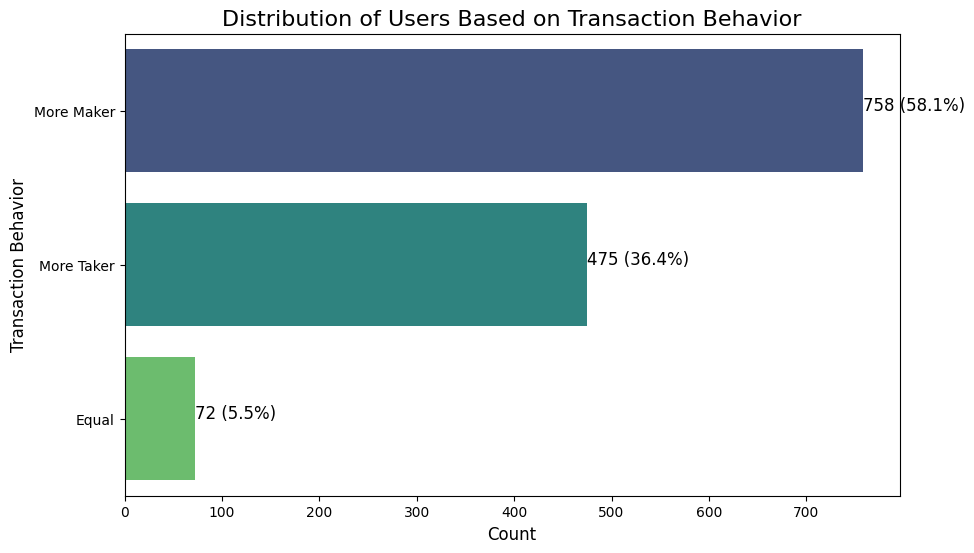

In [36]:
# Define data
data = {
    'Transaction Behavior': ['More Maker', 'More Taker', 'Equal'],
    'Count': [num_more_maker, num_more_taker, num_equal]
}

# Calculate total count
total_count = sum(data['Count'])

# Calculate percentages
percentages = [count / total_count * 100 for count in data['Count']]

# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Transaction Behavior', data=data, palette='viridis')

# Add data labels
for index, value in enumerate(data['Count']):
    label = '{} ({:.1f}%)'.format(value, percentages[index])
    barplot.text(value, index, label, color='black', ha="left", fontsize=12)

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transaction Behavior', fontsize=12)
plt.title('Distribution of Users Based on Transaction Behavior', fontsize=16)

# Show plot
plt.show()

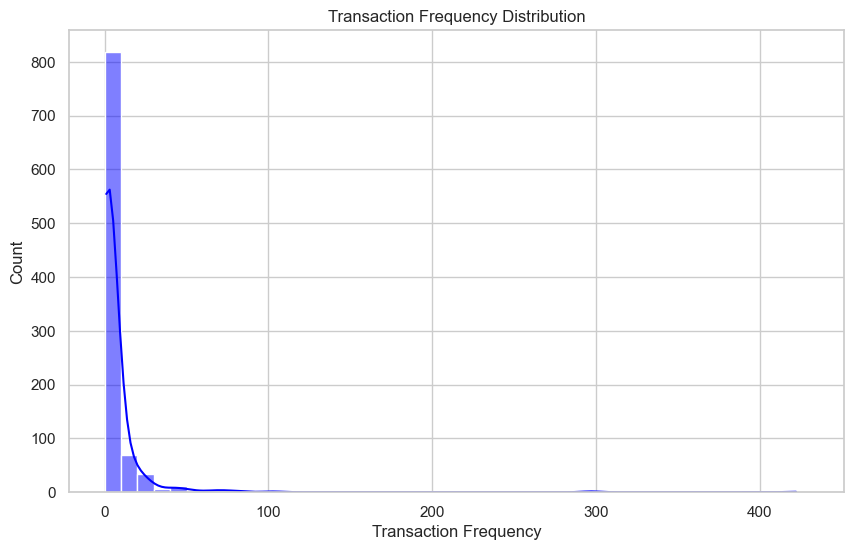

In [167]:
sns.set(style="whitegrid")

# transaction frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(transaction_frequency['TransactionFrequency'], bins=range(0, int(transaction_frequency['TransactionFrequency'].max()) + 10, 10), kde=True, color='blue')
plt.title('Transaction Frequency Distribution')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.show()

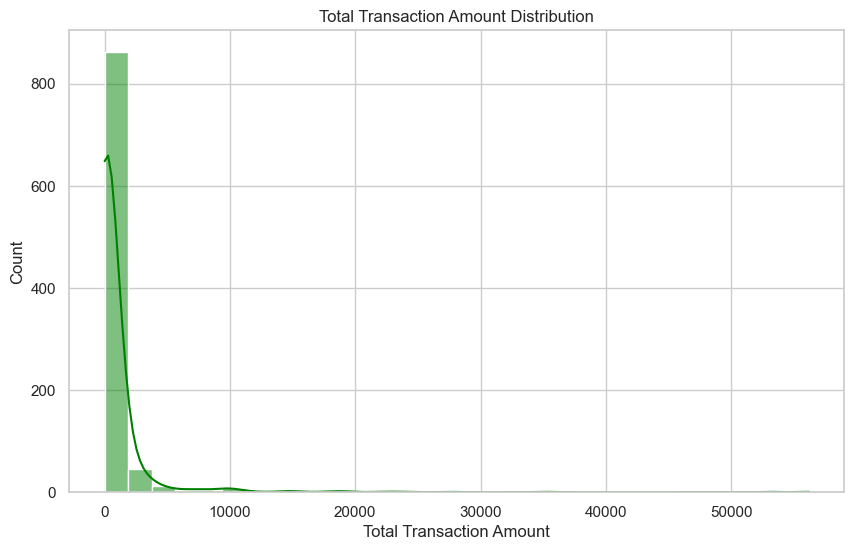

In [169]:
# total transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(transaction_amount['TotalAmount'], bins=30, kde=True, color='green')
plt.title('Total Transaction Amount Distribution')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Count')
plt.show()

C:\Users\alipr\AppData\Local\Temp\ipykernel_9380\2826448116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market', y='TransactionCount', data=popular_currency, palette='Set2', order=popular_currency.sort_values('TransactionCount', ascending=False)['Market'])


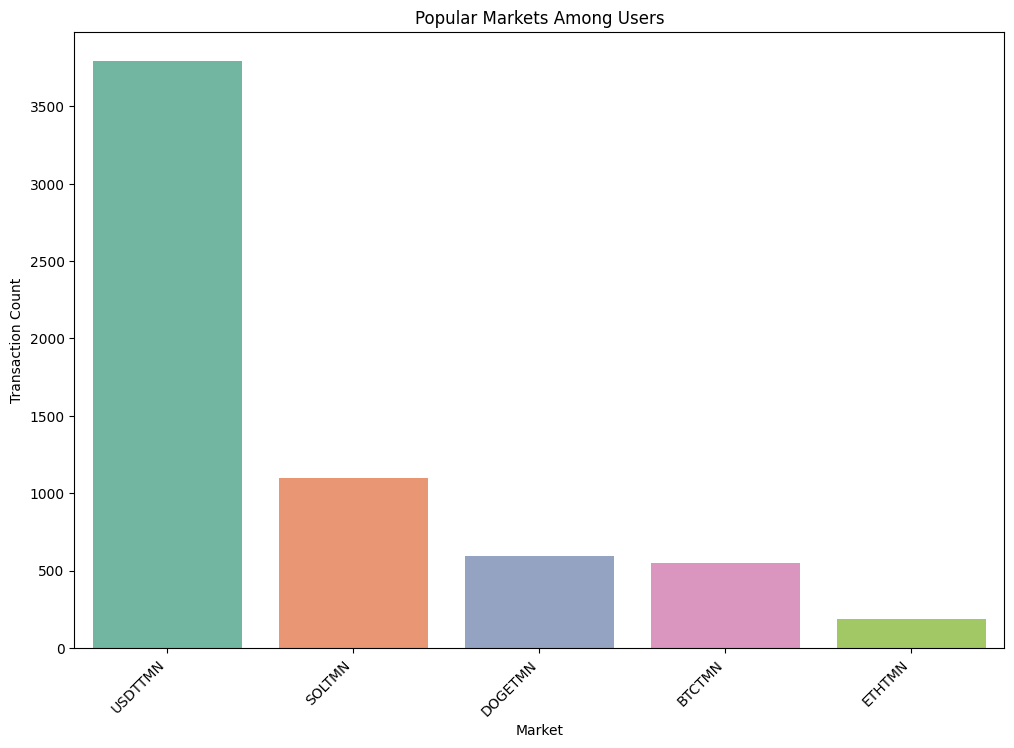

In [28]:
# popular coin currencies
plt.figure(figsize=(12, 8))
sns.barplot(x='Market', y='TransactionCount', data=popular_currency, palette='Set2', order=popular_currency.sort_values('TransactionCount', ascending=False)['Market'])
plt.title('Popular Markets Among Users')
plt.xlabel('Market')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.show()

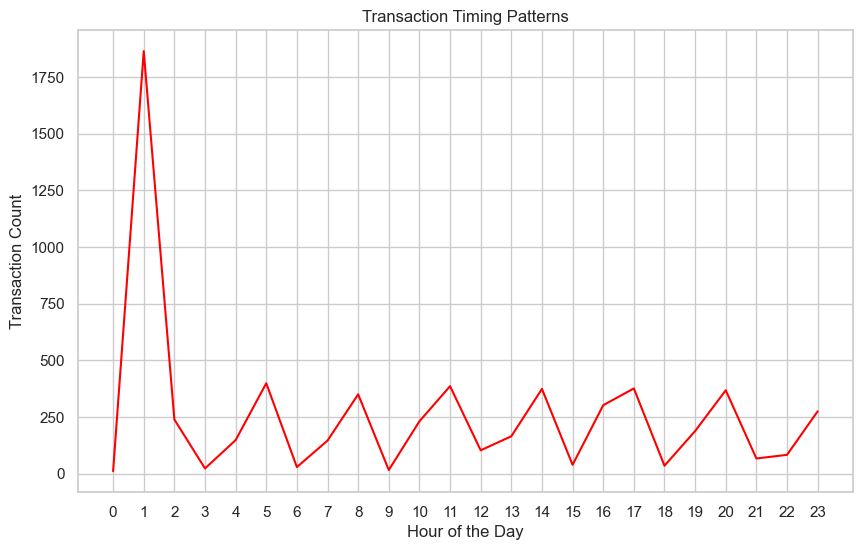

In [126]:
# Plot transaction timing patterns
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='TransactionCount', data=transaction_timing, color='red')
plt.title('Transaction Timing Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

C:\Users\alipr\AppData\Local\Temp\ipykernel_27136\1515222830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='TransactionCount', data=transaction_timing_weekday, palette='muted')


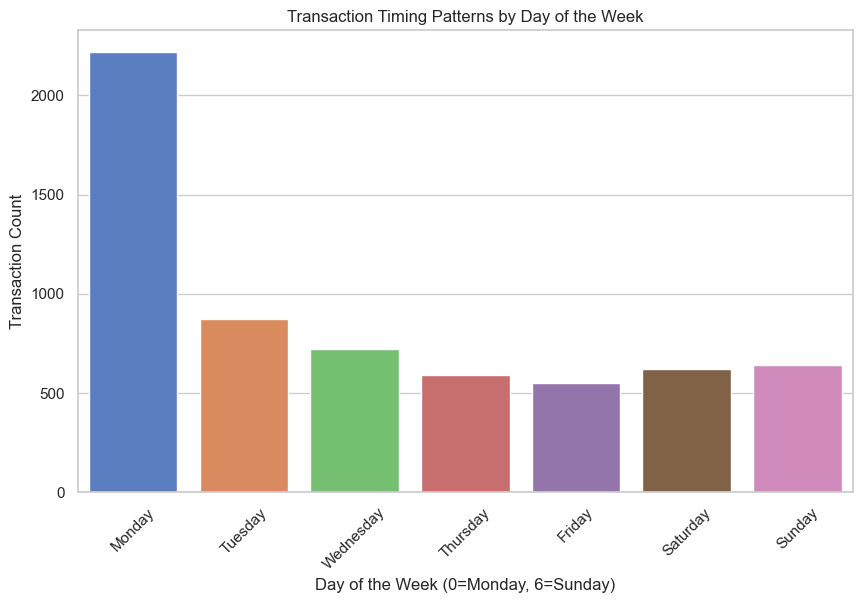

In [182]:
# Plot transaction timing patterns for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TransactionCount', data=transaction_timing_weekday, palette='muted')
plt.title('Transaction Timing Patterns by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Transaction Count')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

             UserID   TotalAmount
count  9.520000e+02    952.000000
mean   2.000732e+09    923.226638
std    1.357182e+04   3577.312663
min    2.000708e+09      0.000006
25%    2.000721e+09      7.831711
50%    2.000732e+09     84.960000
75%    2.000744e+09    496.635000
max    2.000755e+09  56219.310000


C:\Users\alipr\AppData\Local\Temp\ipykernel_27136\523028610.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='VolumeCategory', data=transaction_amount, palette='Set1')


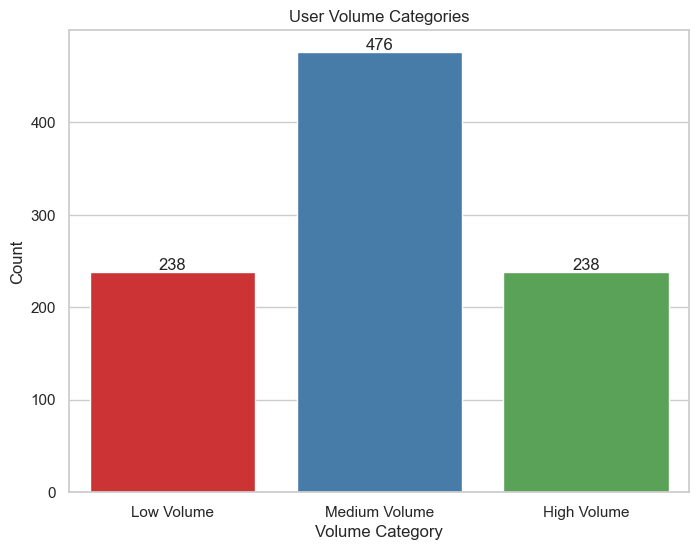

In [187]:
# Determine the quartiles for total transaction amount to define the segments
amount_quartiles = transaction_amount['TotalAmount'].quantile([0.25, 0.5, 0.75])

# Define the segmentation thresholds
low_volume_threshold = amount_quartiles[0.25]
high_volume_threshold = amount_quartiles[0.75]

# Segment users based on total transaction amount
transaction_amount['VolumeCategory'] = pd.cut(transaction_amount['TotalAmount'],
                                              bins=[0, low_volume_threshold, high_volume_threshold, float('inf')],
                                              labels=['Low Volume', 'Medium Volume', 'High Volume'])


# Plot the distribution of user volume categories with data labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='VolumeCategory', data=transaction_amount, palette='Set1')
plt.title('User Volume Categories')
plt.xlabel('Volume Category')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()